In [212]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from scipy import stats
import numpy as np

<div class="alert alert-warning">
<b> Detect outliers using interquartile range rule </b> 

Define a function named get_lower_and_upper_bounds that has two arguments. 

- The first argument is a pandas Series. 

- The second argument is the multiplier, which should have a default argument of 1.5. 
</div>

In [213]:
# REARRANGE NOTEBOOK CELL ORDER BY COL
# OR LABEL WHICH COL ARE WE AT

**Using lemonade.csv dataset and focusing on continuous variables:**

1. Use the IQR Range Rule and the upper and lower bounds to identify the upper & lower outliers of each column of lemonade.csv, using the multiplier of 1.5. 
> Do these outliers make sense?
>
> Which outliers should be kept?

2. Using the multiplier of 3 & IQR Range Rule to identify outliers

In [4]:
df = pd.read_csv('lemonade.csv')

In [5]:
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [93]:
df.Date = pd.to_datetime(df.Date)

In [95]:
df = df.set_index('Date')
df.head()

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-04,Wednesday,44.1,1.05,28,0.5,17
2017-01-05,Thursday,42.4,1.00,33,0.5,18


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.0+ KB


In [96]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,365.0,61.224658,18.085892,15.1,49.70,61.10,71.70,212.0
Rainfall,365.0,0.825973,0.273890,0.4,0.65,0.74,0.91,2.5
Flyers,365.0,40.104110,13.786445,-38.0,31.00,39.00,49.00,80.0
Price,365.0,0.500000,0.000000,0.5,0.50,0.50,0.50,0.5
Sales,365.0,27.589041,29.979680,7.0,20.00,25.00,30.00,534.0


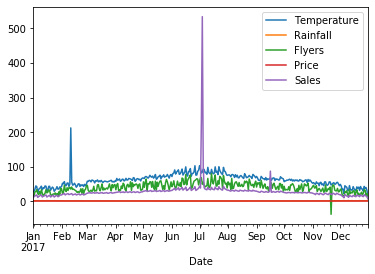

In [105]:
# check peaks:
# Feb - Temp 
# July - Sales
# Nov - negative tumber of flyers
df.plot()

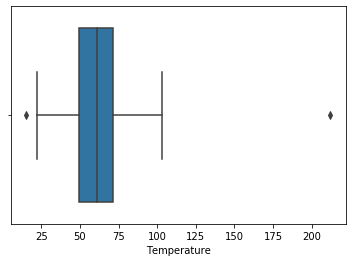

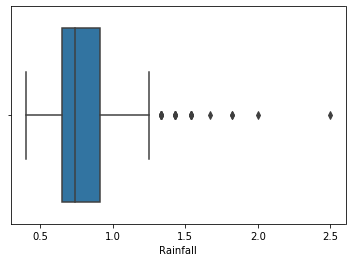

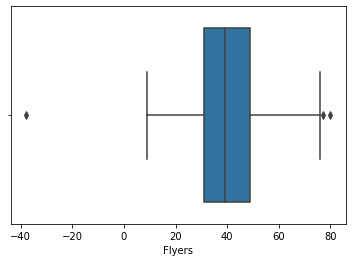

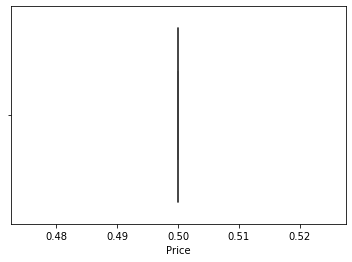

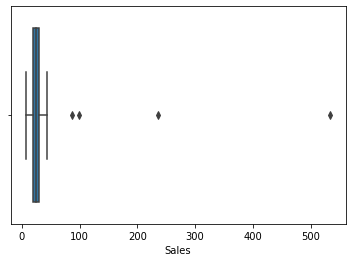

In [30]:
for col in df.select_dtypes(include = ['int', 'float']).columns.to_list():
    sns.boxplot(df[col])
    plt.show()

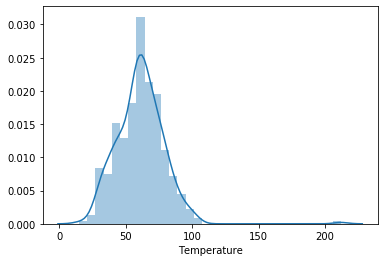

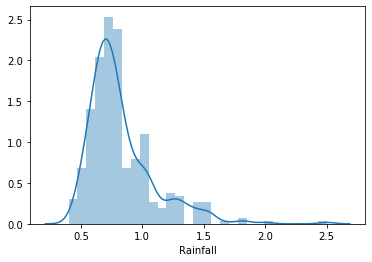

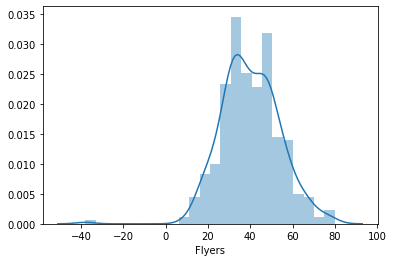

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


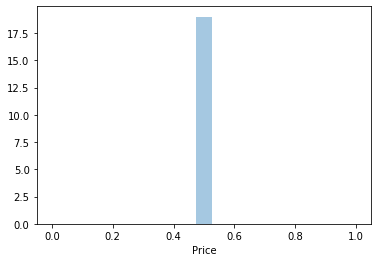

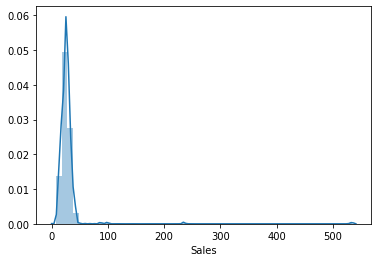

In [45]:
for col in df.select_dtypes(include = ['int','float']).columns.to_list():
    sns.distplot(df[col])
    plt.show()

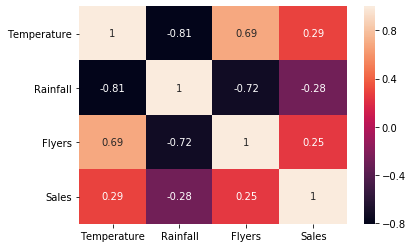

In [138]:
# distributions are relative "normal" so safe to use pearson's R
# rainfall strong negative correlation with temp

sns.heatmap(df.drop(columns = 'Price').corr(),annot = True)

In [148]:
def get_lower_and_upper_bounds(df, col, multiplier = 1.5):
    '''
    s should be pandas series
    '''
    outlier = []
    for c in col:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.75)
        IQR = Q3 - Q1
        lb = Q1 - IQR * multiplier
        ub = Q3 + IQR * multiplier
        outlier = pd.DataFrame(df[(df[col] < lb) | (df[col] > ub)])
        remain = pd.DataFrame(df[(df[col] > lb) & (df[col] < ub)])
    print('outlier of ' + col)
    print('\n')
    print('Describe outlier')
    print(outlier.describe().T)
    print('------------------------------------------------------------------')
    print('Describe what if remove outlier?')
    print(remain.describe().T)
    print('------------------------------------------------------------------')
    print('Whole dataframe:')
    print(df.describe().T)
    sns.distplot(df[col], label = 'original df')
    sns.distplot(remain[col], label = 'removed outlier')
    sns.distplot(outlier[col], label = 'outliers')
    plt.legend()
    plt.show()
    
    return outlier

In [89]:
df.shape

(365, 7)

outlier of Sales


Describe outlier
             count     mean         std   min     25%      50%      75%  \
Temperature    4.0   81.700   10.310836  68.1  78.150   82.850   86.400   
Rainfall       4.0    0.555    0.120692   0.4   0.505    0.565    0.615   
Flyers         4.0   52.250   12.893797  37.0  46.000   52.000   58.250   
Price          4.0    0.500    0.000000   0.5   0.500    0.500    0.500   
Sales          4.0  238.750  207.962136  87.0  96.000  167.000  309.750   

                max  
Temperature   93.00  
Rainfall       0.69  
Flyers        68.00  
Price          0.50  
Sales        534.00  
------------------------------------------------------------------
Describe what if remove outlier?
             count       mean        std    min    25%    50%    75%    max
Temperature  361.0  60.997784  18.031588  15.10  49.70  61.10  71.30  212.0
Rainfall     361.0   0.828975   0.273684   0.47   0.65   0.77   0.91    2.5
Flyers       361.0  39.969529  13.752643 -38.00  31.0

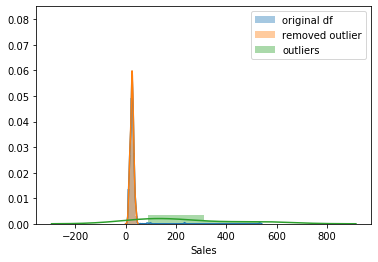

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-07-03,Monday,81.5,0.54,68,0.5,235
2017-07-04,Tuesday,84.2,0.59,49,0.5,534
2017-07-05,Wednesday,93.0,0.40,55,0.5,99
2017-09-16,Saturday,68.1,0.69,37,0.5,87


In [149]:
# get the outliers of Sales, along with the other features 
# notice there are two extreme outleirs, 235 & 534
# should drop if want to build prediction models
# but should keep to study why lemonade stand did so well that day
outlier = get_lower_and_upper_bounds(df, 'Sales', multiplier = 1.5)
outlier

In [113]:
# Is there anything special when we have extremely high sales?
df[df.Sales == 235]

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-07-03,Monday,81.5,0.54,68,0.5,235


In [135]:
# Hypothesis: 
# is the number of flyers handouts significantly higher 
# when the Sales price is extraordinarily high?
#import statsmodels.stats as stat
#stat.ttest_ind(68,40)

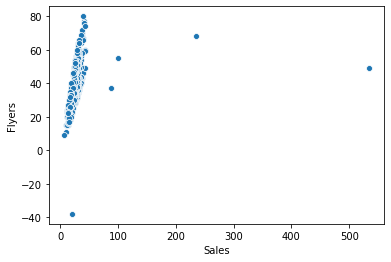

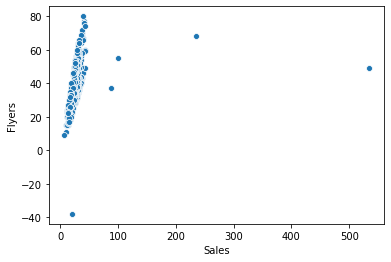

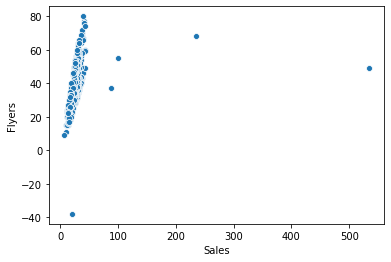

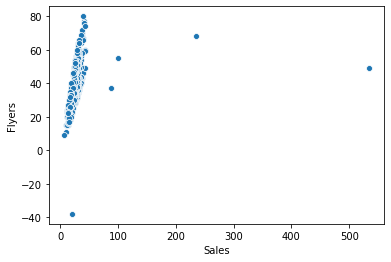

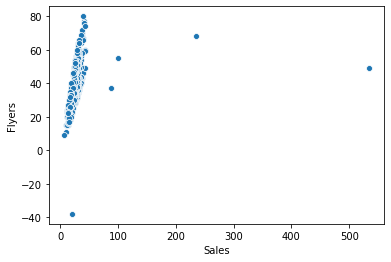

In [134]:
# no strong correlation between Sales and the others
# only 4 numbers
# maybe safe to drop
for c in df.select_dtypes(include = ['int', 'float']).columns.to_list():
    sns.scatterplot('Sales', 'Flyers', data = df)
    plt.show()

In [114]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.589041
std,18.085892,0.273890,13.786445,0.0,29.979680
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


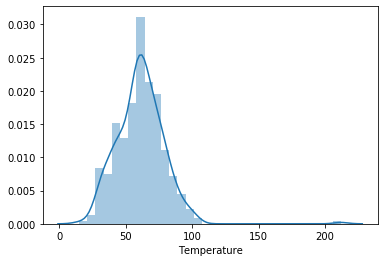

In [109]:
sns.distplot(df.Temperature)

In [ ]:
# first impression, the negative flyer should be dropped

outlier of Flyers


Describe outlier
             count       mean        std    min     25%   50%     75%    max
Temperature    3.0  79.433333  28.324253  47.00  69.500  92.0  95.650  99.30
Rainfall       3.0   0.640000   0.268887   0.47   0.485   0.5   0.725   0.95
Flyers         3.0  39.666667  67.278030 -38.00  19.500  77.0  78.500  80.00
Price          3.0   0.500000   0.000000   0.50   0.500   0.5   0.500   0.50
Sales          3.0  33.666667  11.846237  20.00  30.000  40.0  40.500  41.00
------------------------------------------------------------------
Describe what if remove outlier?
             count       mean        std   min    25%     50%    75%    max
Temperature  360.0  60.875278  17.810310  15.1  49.70  61.100  71.30  212.0
Rainfall     360.0   0.829500   0.273222   0.4   0.65   0.755   0.91    2.5
Flyers       360.0  39.908333  12.660114   9.0  31.00  39.000  49.00   74.0
Price        360.0   0.500000   0.000000   0.5   0.50   0.500   0.50    0.5
Sales        360.0  2

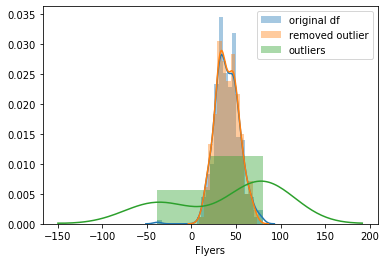

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-07-14,Friday,92.0,0.50,80,0.5,40
2017-11-21,Tuesday,47.0,0.95,-38,0.5,20


In [150]:
outlier =  get_lower_and_upper_bounds(df, 'Flyers', multiplier = 1.5)
outlier

outlier of Rainfall


Describe outlier
             count       mean       std    min     25%    50%    75%   max
Temperature   28.0  31.300000  4.933784  15.10  30.175  31.75  33.75  40.5
Rainfall      28.0   1.520357  0.256594   1.33   1.330   1.43   1.54   2.5
Flyers        28.0  19.964286  4.932749   9.00  16.000  20.00  23.25  27.0
Price         28.0   0.500000  0.000000   0.50   0.500   0.50   0.50   0.5
Sales         28.0  12.785714  1.792105   7.00  12.000  13.00  14.00  15.0
------------------------------------------------------------------
Describe what if remove outlier?
             count       mean        std   min    25%    50%    75%     max
Temperature  337.0  63.710979  16.479617  32.2  54.20  61.80  72.00  212.00
Rainfall     337.0   0.768279   0.180159   0.4   0.65   0.74   0.87    1.25
Flyers       337.0  41.777448  12.936004 -38.0  33.00  41.00  50.00   80.00
Price        337.0   0.500000   0.000000   0.5   0.50   0.50   0.50    0.50
Sales        337.0  28.818991  

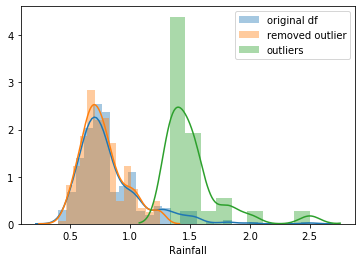

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-02,Monday,28.9,1.33,15,0.5,13
2017-01-03,Tuesday,34.5,1.33,27,0.5,15
2017-01-06,Friday,25.3,1.54,23,0.5,11
2017-01-07,Saturday,32.9,1.54,19,0.5,13
2017-01-11,Wednesday,32.6,1.54,23,0.5,12
2017-01-12,Thursday,38.2,1.33,16,0.5,14
2017-01-13,Friday,37.5,1.33,19,0.5,15
2017-01-16,Monday,30.6,1.67,24,0.5,12


In [151]:
# remover rain outlier or not doesn't seem to change stat distribution too much 
# seemed like we will miss a lot of data if drop all the 
# not too crazy rainfall data
# keep all
outlier =  get_lower_and_upper_bounds(df, 'Rainfall', multiplier = 1.5)
outlier


outlier of Temperature


Describe outlier
             count     mean         std    min      25%      50%       75%  \
Temperature    2.0  113.550  139.229325  15.10  64.3250  113.550  162.7750   
Rainfall       2.0    1.705    1.124300   0.91   1.3075    1.705    2.1025   
Flyers         2.0   22.000   18.384776   9.00  15.5000   22.000   28.5000   
Price          2.0    0.500    0.000000   0.50   0.5000    0.500    0.5000   
Sales          2.0   14.000    9.899495   7.00  10.5000   14.000   17.5000   

               max  
Temperature  212.0  
Rainfall       2.5  
Flyers        35.0  
Price          0.5  
Sales         21.0  
------------------------------------------------------------------
Describe what if remove outlier?
             count       mean        std   min    25%    50%    75%    max
Temperature  363.0  60.936364  16.129086  22.0  49.85  61.10  71.50  102.9
Rainfall     363.0   0.821129   0.260088   0.4   0.65   0.74   0.91    2.0
Flyers       363.0  40.203857  13.7244

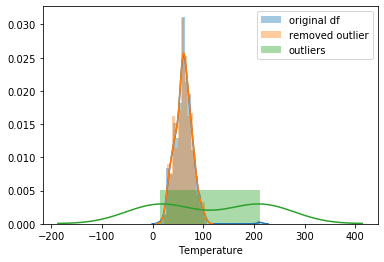

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21
2017-12-31,Sunday,15.1,2.50,9,0.5,7


In [152]:
outlier =  get_lower_and_upper_bounds(df, 'Temperature', multiplier = 1.5)
outlier

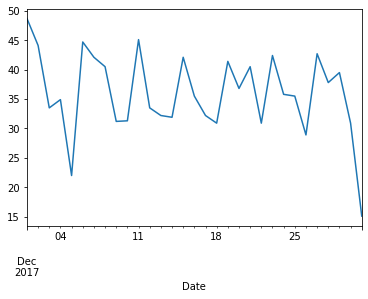

In [143]:
# low Temperature of 15.1 is possible, unlike 212
# can keep temp = 15.1
df["2017-12-01":].Temperature.plot()

In [204]:
def find_outlier_sigma(df, col, multiplier = 2):
    
    mean = df[col].mean()
    sd = df[col].std()
    lb = mean - multiplier * sd
    ub = mean + multiplier * sd
    lb3 = mean - 3 * sd
    ub3 = mean + 3 * sd
    
    out_2_sig = pd.DataFrame(df[(df[col] > ub) | (df[col] < lb)])
    
    # plot
    sns.distplot(df[col], kde=False)
    
    # draw boundaries: σ
    plt.axvline(ub, color="k", linestyle="--", label = '2σ')
    plt.axvline(lb, color="k", linestyle="--")
    plt.axvline(ub3, color="y", linestyle="--", label = '3σ')
    plt.axvline(lb3, color="y", linestyle="--")

    plt.legend()
    plt.show()
    return out_2_sig
    

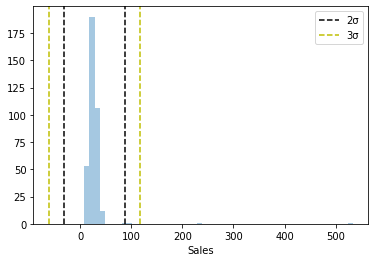

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-07-03,Monday,81.5,0.54,68,0.5,235
2017-07-04,Tuesday,84.2,0.59,49,0.5,534
2017-07-05,Wednesday,93.0,0.40,55,0.5,99


In [205]:
find_outlier_sigma(df, 'Sales', multiplier = 2)

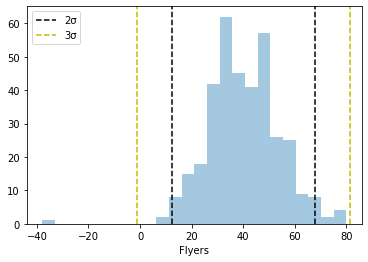

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-06-20,Tuesday,85.1,0.54,70,0.5,37
2017-06-21,Wednesday,94.3,0.47,76,0.5,41
2017-07-02,Sunday,93.4,0.51,68,0.5,38
2017-07-03,Monday,81.5,0.54,68,0.5,235
2017-07-14,Friday,92.0,0.50,80,0.5,40
2017-07-18,Tuesday,99.3,0.47,76,0.5,41
2017-07-23,Sunday,89.1,0.51,72,0.5,37
2017-07-24,Monday,83.5,0.57,69,0.5,35


In [206]:
# once again visualized the super outlier '-38'
find_outlier_sigma(df, 'Flyers', multiplier = 2)

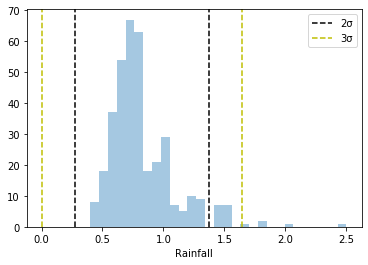

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-06,Friday,25.3,1.54,23,0.5,11
2017-01-07,Saturday,32.9,1.54,19,0.5,13
2017-01-11,Wednesday,32.6,1.54,23,0.5,12
2017-01-16,Monday,30.6,1.67,24,0.5,12
2017-01-17,Tuesday,32.2,1.43,26,0.5,14
2017-01-20,Friday,31.6,1.43,20,0.5,12
2017-01-24,Tuesday,28.6,1.54,20,0.5,12
2017-12-04,Monday,34.9,1.54,16,0.5,13


In [207]:
find_outlier_sigma(df, 'Rainfall', multiplier = 2)

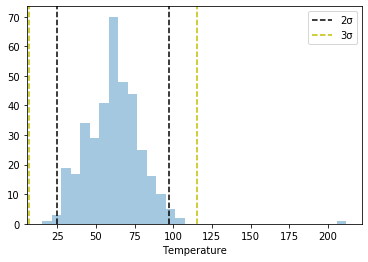

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-02-11,Saturday,212.0,0.91,35,0.5,21
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-06-26,Monday,102.6,0.47,60,0.5,42
2017-07-01,Saturday,102.9,0.47,59,0.5,43
2017-07-10,Monday,98.0,0.49,66,0.5,40
2017-07-18,Tuesday,99.3,0.47,76,0.5,41
2017-07-22,Saturday,99.6,0.47,49,0.5,42
2017-07-27,Thursday,97.9,0.47,74,0.5,43
2017-12-05,Tuesday,22.0,1.82,11,0.5,10


In [208]:
find_outlier_sigma(df, 'Temperature', multiplier = 2)

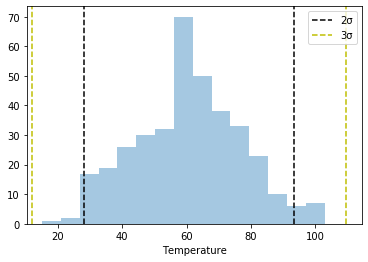

,Day,Temperature,Rainfall,Flyers,Price,Sales
Date,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10
2017-01-06,Friday,25.3,1.54,23,0.5,11
2017-06-16,Friday,99.3,0.47,77,0.5,41
2017-06-21,Wednesday,94.3,0.47,76,0.5,41
2017-06-26,Monday,102.6,0.47,60,0.5,42
2017-07-01,Saturday,102.9,0.47,59,0.5,43
2017-07-02,Sunday,93.4,0.51,68,0.5,38
2017-07-10,Monday,98.0,0.49,66,0.5,40
2017-07-18,Tuesday,99.3,0.47,76,0.5,41


In [209]:
# after dropping the extreme outlier that does not seem possible to be naturally occuring
a = df[df.Temperature < 200]
find_outlier_sigma(a, 'Temperature', multiplier = 2)

<style>
div.warn {    
    background-color: #fcf2f2;
    border-color: #dFb5b4;
    border-left: 5px solid #dfb5b4;
    padding: 0.5em;
    }
 </style>

In [ ]:
df.loc[df.Temperature ==212, 'Temperature'] = 50

In [214]:
df.loc[df.Temperature ==212, 'Temperature']

Date
2017-02-11    212.0
Name: Temperature, dtype: float64

In [ ]:
#Data Frame
lemonade = pd.read_csv("lemonade.csv")
#Subset the Data Frame with Temperature
#Center Temperature data
temperature = pd.DataFrame(lemonade["Temperature"])
temperature["mean"] = temperature["Temperature"].mean()
temperature["centered"] = temperature["Temperature"] - temperature["mean"]
#Create separate Inlier and Outlier data frame
temp2sig = temperature.centered.std()*2
temp2sig_inlier = temperature[(temperature.centered <= temp2sig) | (temperature.centered <= temp2sig*-1)]
temp2sig_outlier = temperature[~(temperature.centered <= temp2sig) | (temperature.centered <= temp2sig*-1)]
#Plot on top of each other
sns.scatterplot(x=temp2sig_inlier["Temperature"], y= temp2sig_inlier.index, color="navy")
sns.scatterplot(x=temp2sig_outlier["Temperature"], y= temp2sig_outlier.index, color="red")
plt.show()

In [ ]:
df['outliers'] = (df.Flyers < lower_mild_outlier.Flyers) | (df.Flyers > upper_mild_outlier.Flyers)
sns.scatterplot(data=df,x='Temperature',y='Sales',hue='outliers')

In [ ]:
def get_lb_ub(df, col_list, multiplier = 1.5):
    '''
    s should be pandas series
    '''
    low_up = pd.DataFrame(columns = ['col_name', 'lower_bound', 'upper_bound'])
    for c in col_list:
        Q1 = df[col].quantile(.25)
        Q3 = df[col].quantile(.75)
        IQR = Q3 - Q1
        lb = Q1 - IQR * multiplier
        ub = Q3 + IQR * multiplier
        low_up = pd.concat([pd.DataFrame
                           ([c, lb, ub]
                           ,columns = ['col_name', 'lower_bound', 'upper_bound'])
                           ])
        
    
    return low_up

pd.concat([pd.DataFrame(
    [[model_type, i, 'mse', evaluate(target_var = i, train = train, test = test, output=False) [0]],
     [model_type, i, 'rmse', evaluate(target_var = i, train = train, test = test, output=False)[1]]
    ],
     columns=['model_type', 'target_var', 'metric', 'value']) 
                              for i in target_vars], ignore_index=True)